# Data: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

# Import data

In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
data = pd.read_csv('weatherAUS.csv')

In [3]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [4]:
X = data.iloc[:,:-1]

In [5]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2


# Only for this dataset, delete otherwise (Weather AUS)

X.drop('RISK_MM', axis=1, inplace=True)

In [6]:
X.drop('RISK_MM', axis=1, inplace=True)

In [7]:
y = data.iloc[:,-1]

In [8]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

# Handling missing data - Numeric type

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [10]:
#X.dtypes

In [11]:
numerical_cols = list(np.where((X.dtypes == np.int64) | (X.dtypes == np.float64))[0])

In [12]:
imp_mean.fit(X.iloc[:,numerical_cols])

SimpleImputer()

In [13]:
X.iloc[:,numerical_cols] = imp_mean.transform(X.iloc[:,numerical_cols])

### Handling missing string data

In [14]:
string_cols = list(np.where((X.dtypes == np.object))[0])

In [15]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [16]:
imp_mean.fit(X.iloc[:,string_cols])

SimpleImputer(strategy='most_frequent')

In [17]:
X.iloc[:,string_cols] = imp_mean.transform(X.iloc[:,string_cols])

# One Hot encoder method

In [18]:
def OneHotEncoderMethod(indices, data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices )], remainder='passthrough')
    return columnTransformer.fit_transform(data)

# Label encoding method

In [19]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(series)
    #print('Actual labels',le.classes_)
    #print('Encoding values',le.transform(pd.unique(series)))
    return le.transform(series) 

# Label encoding target feature

In [20]:
y = LabelEncoderMethod(y)

# Encoding selection for X

In [21]:
def EncodingSelection(X, threshold=10):
    # Step 01 : Select the string col
    string_cols = list(np.where((X.dtypes == np.object))[0])
    one_hot_encoding_indices = []
    
    # Step 02: The number of categoty is 2 and more than threshold, label encode
    for col in string_cols:
        lenght = len(pd.unique(X[X.columns[col]]))
        if lenght == 2 or lenght > threshold:
            X[X.columns[col]] = LabelEncoderMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
            
    # Step 03: One hot encode otherwise 
    X = OneHotEncoderMethod(one_hot_encoding_indices, X)
    return X

In [22]:
X = EncodingSelection(X)

In [23]:
X.shape

(142193, 22)

# Feature selection

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

In [25]:
kbest = SelectKBest(score_func=chi2, k=10)

In [26]:
from sklearn import preprocessing
MMS = preprocessing.MinMaxScaler()

In [27]:
K_features = 2

In [28]:
x_temp = MMS.fit_transform(X)

In [29]:
x_temp = kbest.fit(x_temp,y)

In [30]:
best_features = np.argsort(x_temp.scores_)[-K_features:]

In [31]:
best_features

array([14, 21], dtype=int64)

In [32]:
features_to_delete = best_features = np.argsort(x_temp.scores_)[:-K_features]

In [33]:
X = np.delete(X, features_to_delete, axis=1)

In [34]:
X.shape

(142193, 2)

In [35]:
del x_temp

# Train test split

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
print(X_train.shape)

(113754, 2)


# Feature scaling

### Standardization: (X - mean(X)) / std(X)

### Normalization = (x - min(x)) / (max(x) - min(x))

In [39]:
from sklearn import preprocessing

In [40]:
sc = preprocessing.StandardScaler(with_mean=False)

In [41]:
sc.fit(X_train)

StandardScaler(with_mean=False)

In [42]:
X_train = sc.transform(X_train)

In [43]:
print(X_train.shape)

(113754, 2)


In [44]:
X_test = sc.transform(X_test)

In [45]:
print(X_test.shape)

(28439, 2)


#### The data is ready!!

In [46]:
from sklearn.metrics import accuracy_score

# Building KNN model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(X_train,y_train)
y_pred = knnClassifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.8002742712472309

# Building Logistic regression model

In [48]:
from sklearn.linear_model import LogisticRegression
LRM = LogisticRegression(random_state=0,max_iter=200)
LRM.fit(X_train,y_train)
y_pred = LRM.predict(X_test)
accuracy_score(y_pred,y_test)


0.8296705228735187

# Building GaussianNB model

In [58]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train,y_train)
y_pred = model_GNB.predict(X_test)
accuracy_score(y_pred,y_test)

0.7959843876366961

In [62]:
#decision regions visualization code
#pip install mlxtend
def visualize_decision_regions(X,y,model):
    from mlxtend.plotting import plot_decision_regions
    import matplotlib.pyplot as plt
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model)

    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [63]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target


KNN_V = KNeighborsClassifier(n_neighbors=3)
KNN_V.fit(X,y)


LRM_V = LogisticRegression(random_state=0,max_iter=200)
LRM_V.fit(X,y)

GNB_V = GaussianNB()
GNB_V.fit(X,y)



GaussianNB()

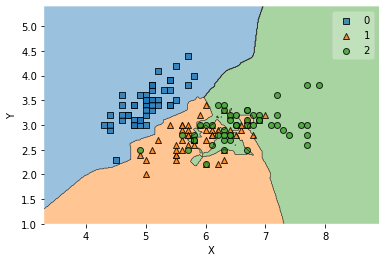

In [64]:
visualize_decision_regions(X,y,KNN_V)

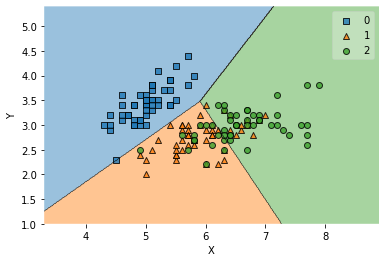

In [57]:
visualize_decision_regions(X,y,LRM)

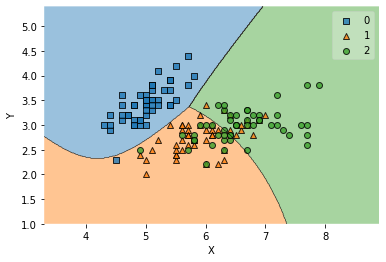

In [65]:
visualize_decision_regions(X,y,GNB_V)